In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Import train and test split functions
from sklearn.model_selection import train_test_split



In [68]:
# Download data from source
!gdown 1RX3DgPDdVv8wXg43L2tzV6eAJvG7OgkY

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Downloading...
From: https://drive.google.com/uc?id=1RX3DgPDdVv8wXg43L2tzV6eAJvG7OgkY
To: /gpfs/data1/cmongp/Sandeep/Github/MSML_641_Project/final_feature_data.csv
100%|████████████████████████████████████████| 748k/748k [00:00<00:00, 8.16MB/s]


#### Analyse and Clean the data

225.78724859852508


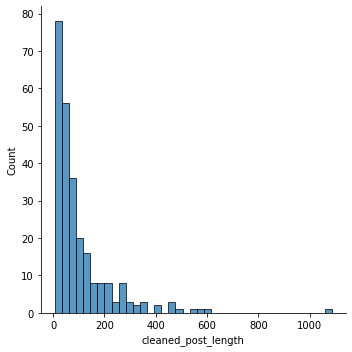

In [69]:
df = pd.read_csv('final_feature_data.csv', index_col=0)
df.dropna(inplace=True)
df['cleaned_post_length'] = df['cleaned_body'].apply(lambda x: len(x.split(' ')))
sns.displot(df['cleaned_post_length'])
print(df['cleaned_post_length'].mean()+ df['cleaned_post_length'].std())

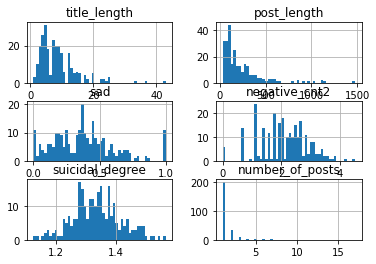

In [70]:
numerical_columns = ['title_length','post_length','sad','negative_cnt2','suicidal_degree','number_of_posts']
text_column = ['cleaned_body']
label_column = ['labels']

# # Apply min-max scaling to the text columns
# scaler = StandardScaler()
# scaled_values = scaler.fit_transform(df[numerical_columns])
# df.loc[:, numerical_columns] = scaled_values
    
# Visualize the histograms of the numerical columns
df[numerical_columns].hist(bins=50)
plt.show()

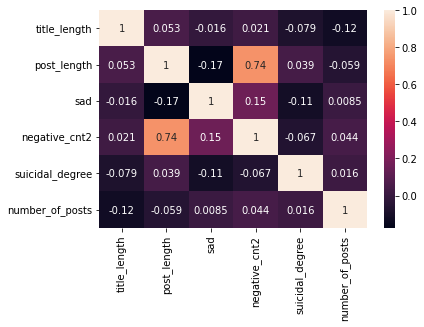

In [71]:
# Generate heatmap of correlation between numerical columns
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [72]:
# Perform train/valid/test split with stratified sampling
X = df.drop(['labels'], axis=1)
y = df.labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the size of the train, valid, and test sets
print(f'Train set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')

Train set size: 207
Validation set size: 52


Convert the text columns into Roberta features.

In [73]:
# Drop user_id, post_body, post_title, cleaned_body, cleaned_title
X_train.drop(['user_id', 'post_body', 'post_title', 'cleaned_title'], axis=1, inplace=True)
X_val.drop(['user_id', 'post_body', 'post_title', 'cleaned_title'], axis=1, inplace=True)

In [74]:
# Save the train, valid, and test sets to pickle files
X_train.to_pickle('X_train.pkl')
X_val.to_pickle('X_val.pkl')
y_train.to_pickle('y_train.pkl')
y_val.to_pickle('y_val.pkl')